# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path

# Study data files
mouse_metadata_path = Path('./Pymaceuticals/data/Mouse_metadata.csv')
study_results_path = Path('./Pymaceuticals/data/Study_results.csv')


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Pymaceuticals_DF = pd.merge(mouse_metadata, study_results, how='left', on=["Mouse ID"])

# Display the data table for preview
Pymaceuticals_DF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [58]:
# Checking the number of mice.
len(Pymaceuticals_DF["Mouse ID"].unique())

249

In [124]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_metadata["Mouse ID"].duplicated(keep=False)

0      False
1      False
2      False
3      False
4      False
       ...  
244    False
245    False
246    False
247    False
248    False
Name: Mouse ID, Length: 249, dtype: bool

In [50]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Pymaceuticals_DF[["Mouse ID", "Timepoint"]].duplicated()



KeyError: "None of [Index(['Mouse ID', 'Timepoint'], dtype='object')] are in the [index]"

In [35]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicated = Pymaceuticals_DF.duplicated()
Duplicaterows = Duplicated.loc[Duplicated[1]==False]


KeyError: True

In [70]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Pymaceuticals_DF = Pymaceuticals_DF.drop_duplicates(["Mouse ID"])
Pymaceuticals_DF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [69]:
# Checking the number of mice in the clean DataFrame.
len(Pymaceuticals_DF["Mouse ID"].unique())

249

## Summary Statistics

In [83]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Drug_Regimen_Mean = Pymaceuticals_DF.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Drug_Regimen_Median = Pymaceuticals_DF.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Drug_Regimen_Variance = Pymaceuticals_DF.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Drug_Regimen_Std = Pymaceuticals_DF.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Drug_Regimen_Sem = Pymaceuticals_DF.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_df = pd.DataFrame({"Mean Tumor Volume": Drug_Regimen_Mean, "Median Tumor Volume": Drug_Regimen_Median, "Tumor Volume Variance": Drug_Regimen_Variance, "Tumor Vol Std.Dev.": Drug_Regimen_Std, "Tumor Vol Std.Err.": Drug_Regimen_Sem })
summary_df





,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Vol Std.Dev.,Tumor Vol Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
pd.agg

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

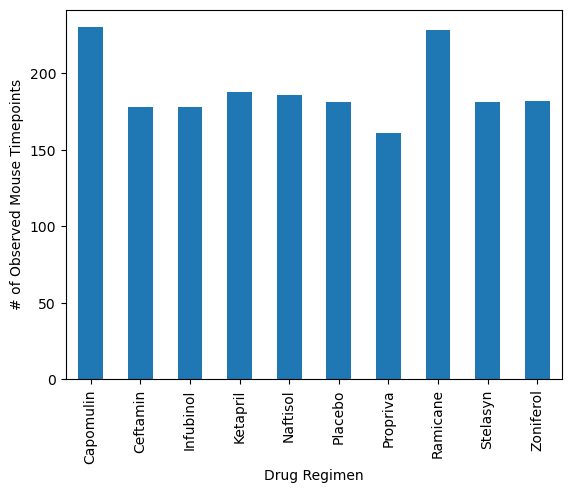

In [94]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
observed_timepoints = Pymaceuticals_DF.groupby("Drug Regimen")["Timepoint"].count()
Bar_df = pd.DataFrame({"Observed Timepoints": observed_timepoints})
Bar_df.plot(kind="bar",xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints",legend=False)

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


TypeError: 'Series' object is not callable

<Axes: ylabel='Sex Count'>

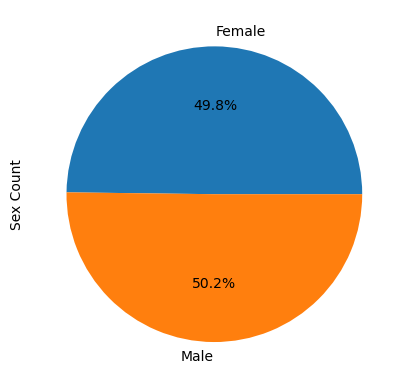

In [160]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Sex_Count_Panda = mouse_metadata.groupby("Sex")["Sex"].count()
Mouse_Pie_df = pd.DataFrame({"Sex Count": Sex_Count_Panda})
Mouse_Pie_df
Mouse_Pie_df.plot(kind="pie", y="Sex Count", legend=False, autopct="%1.1f%%")



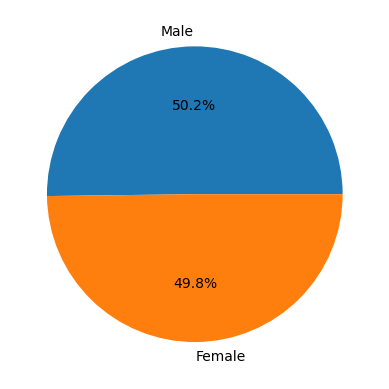

In [157]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Sex_label = mouse_metadata["Sex"].unique()
Sex_count = mouse_metadata["Sex"].value_counts()
Sex_count

plt.pie(Sex_count, labels=Sex_label,autopct="%1.1f%%")










## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen